In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the dataset
liver_data = pd.read_csv("liver.csv")

In [3]:
#Check the head
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


#### Description of variables

                 Total_Bilirubin:-   Total Billirubin in mg/dL
                Direct_Bilirubin:-   Conjugated Billirubin in mg/dL
            Alkaline_Phosphotase:-   ALP in IU/L
         Alamine_Aminotransferase:-  ALT in IU/L
       Aspartate_Aminotransferase:-  AST in IU/L
                   Total_Protiens:-  Total Proteins g/dL
                          Albumin:-  Albumin in g/dL 
       Albumin_and_Globulin_Ratio:-  A/G ratio











In [4]:
#Check the structure of dataset
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
#Check the summary statistics of dataset
liver_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [8]:
#Check for any null values
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [4]:
#Fill the null value in Albumin_and_Globulin_Ratio with mean
mean_AG_Ratio = np.mean(liver_data['Albumin_and_Globulin_Ratio'])
liver_data['Albumin_and_Globulin_Ratio'] = liver_data['Albumin_and_Globulin_Ratio'].fillna(mean_AG_Ratio)

### EDA

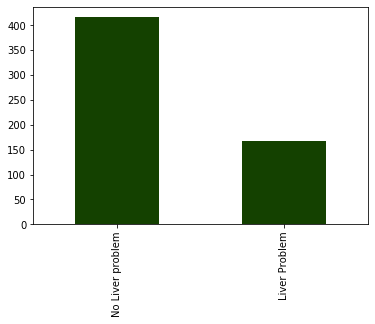

In [12]:
liver_data['Dataset'].value_counts().plot.bar(color='#144100')
x_values = ["No Liver problem", "Liver Problem"]
x_axis = np.arange(0, 2, 1)
plt.xticks(x_axis,x_values)
plt.show()

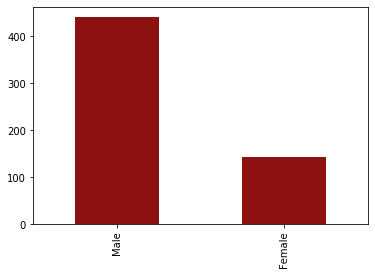

In [18]:
liver_data['Gender'].value_counts().plot.bar(color='#8d1111')
plt.show()

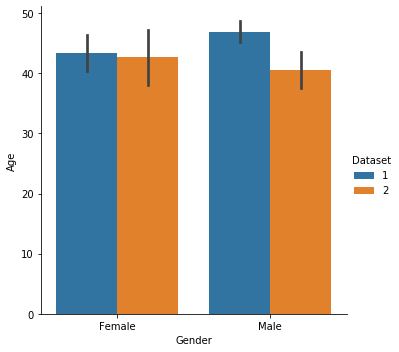

In [16]:
sns.catplot(data=liver_data,x='Gender',y='Age',hue='Dataset',kind='bar')
plt.show()

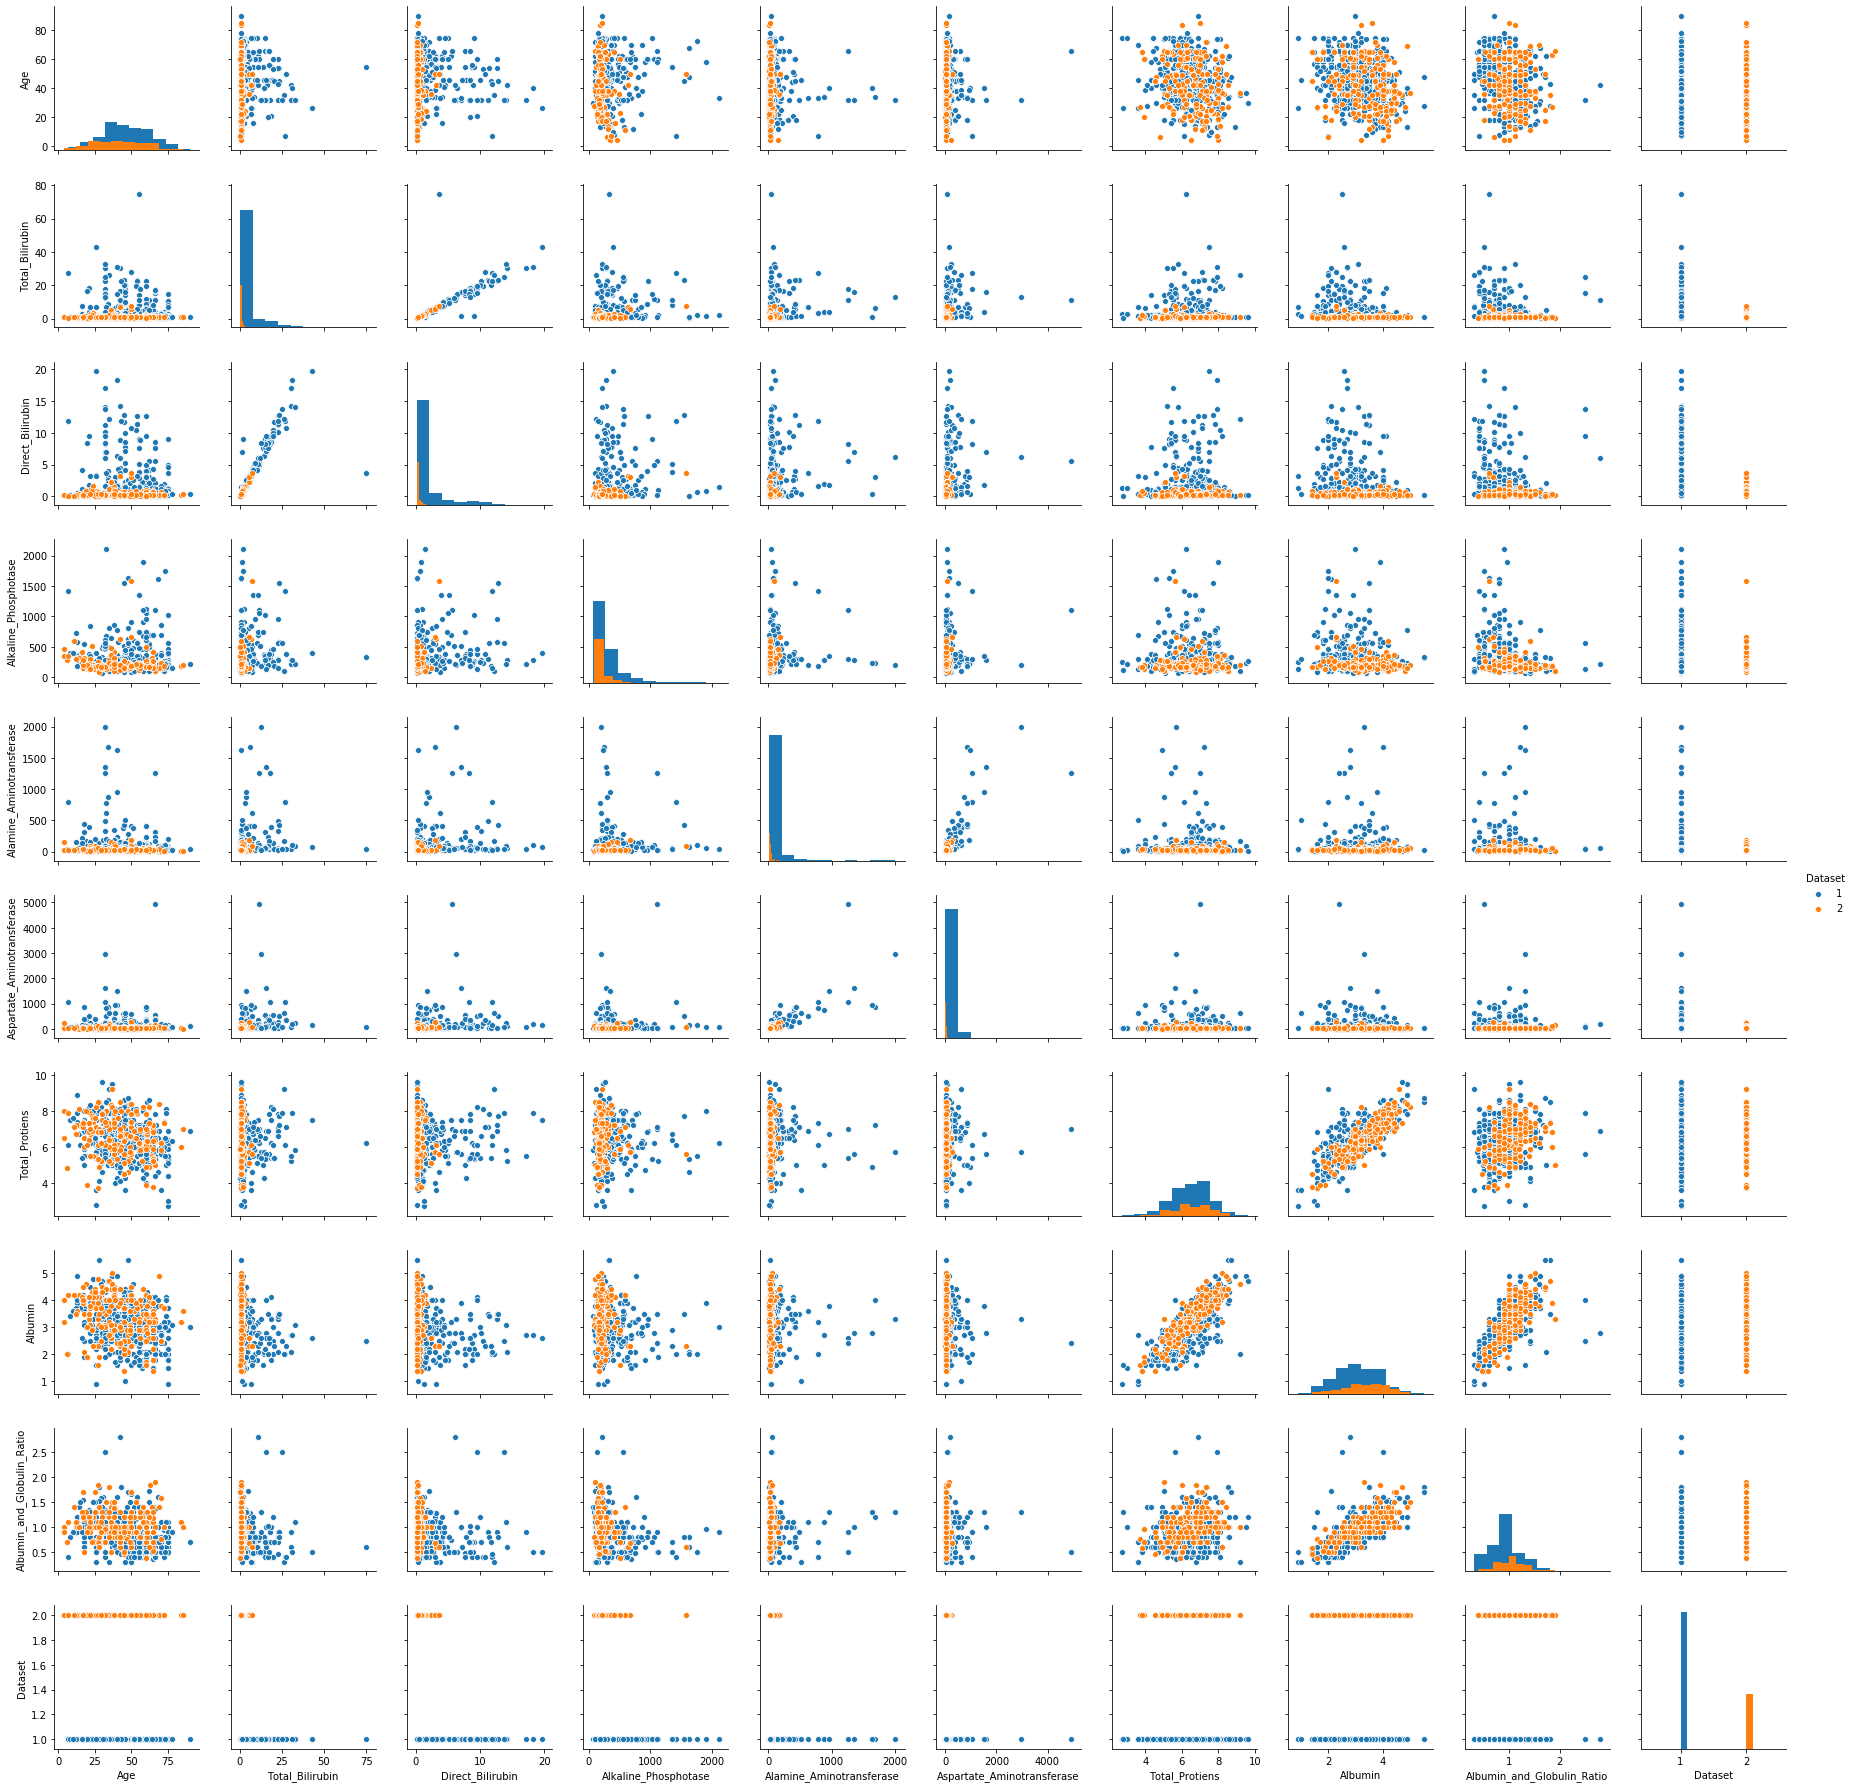

In [19]:
sns.pairplot(liver_data, kind='scatter', diag_kind='hist',hue='Dataset')
plt.show()

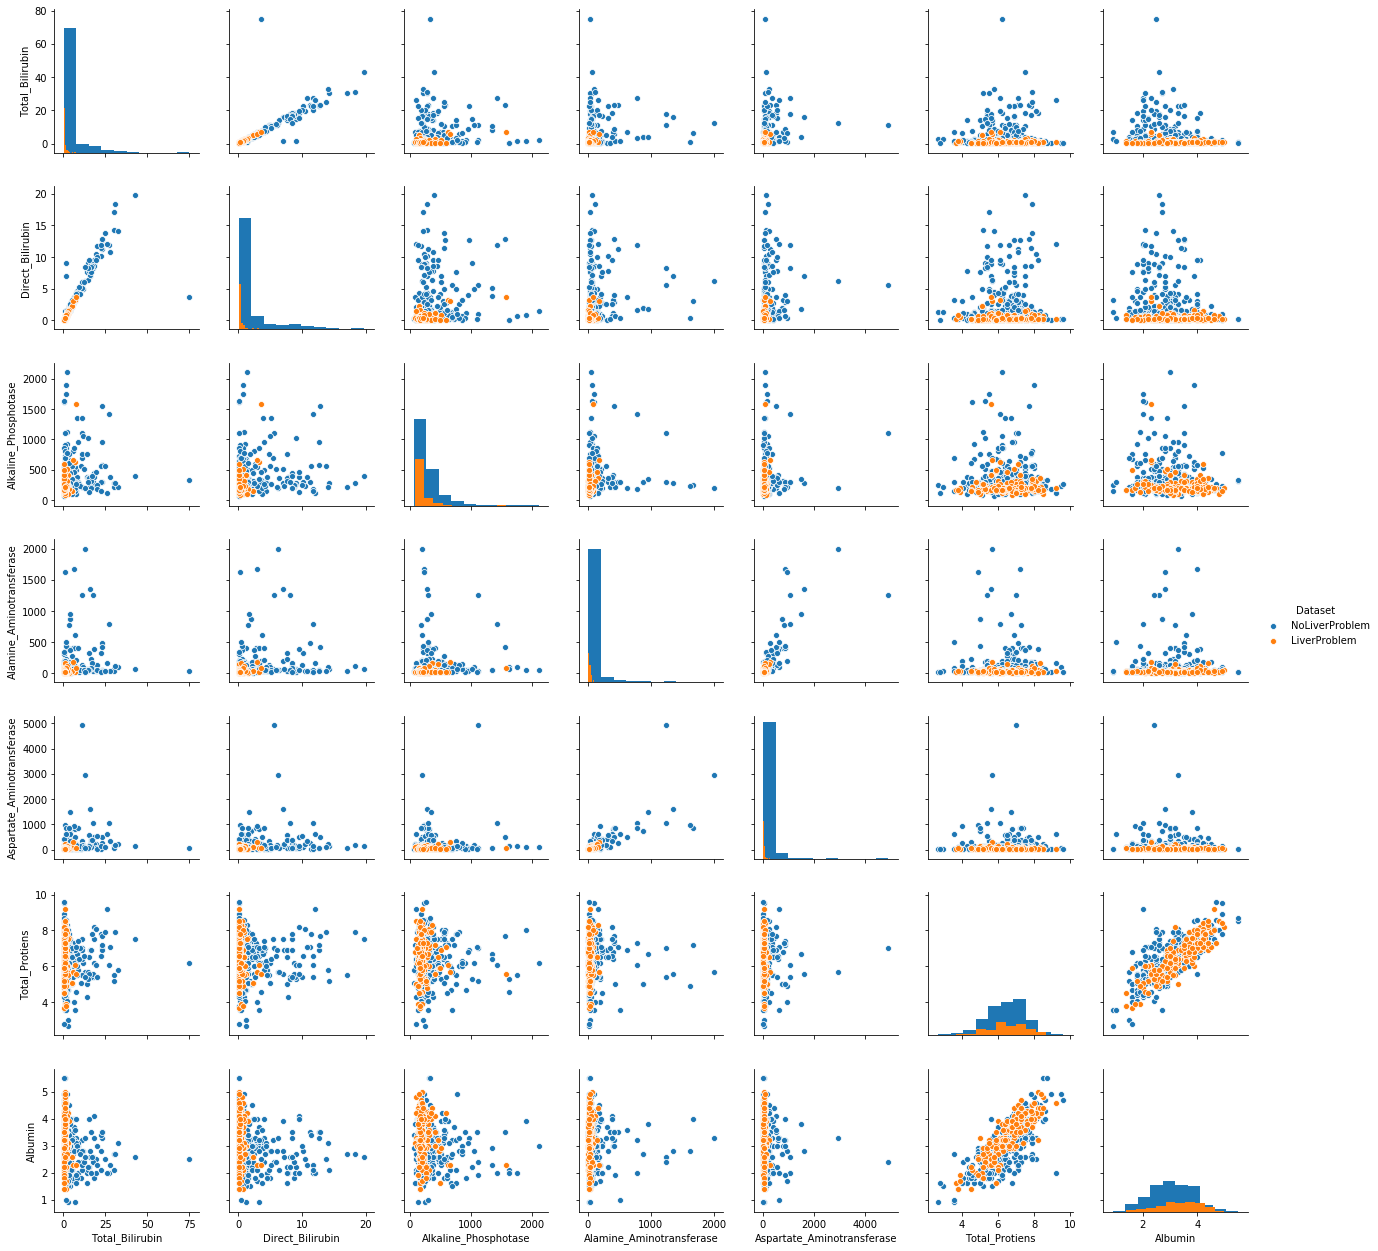

In [23]:
df = liver_data.copy()
df['Dataset'] = np.where(df['Dataset']==1,"NoLiverProblem","LiverProblem")
var = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase','Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin','Dataset' ]
sns.pairplot(df[var], kind='scatter', diag_kind='hist',hue='Dataset')
plt.show()

From the Pairplot above there seems a linear relationship between (Total_Bilirubin & Direct_Bilirubin),(Alamine_Aminotransferase & Aspartate_Aminotransferase), (Total_Protiens & Albumin)

In [5]:
#Convert Gender to numerical values
liver_data['Gender'] = np.where(liver_data['Gender']=='Male',1,0)

#Convert the target to 1s and 0s
liver_data['Dataset'] = np.where(liver_data['Dataset']==1,1,0)

Text(0.5, 1, 'Correlation between features')

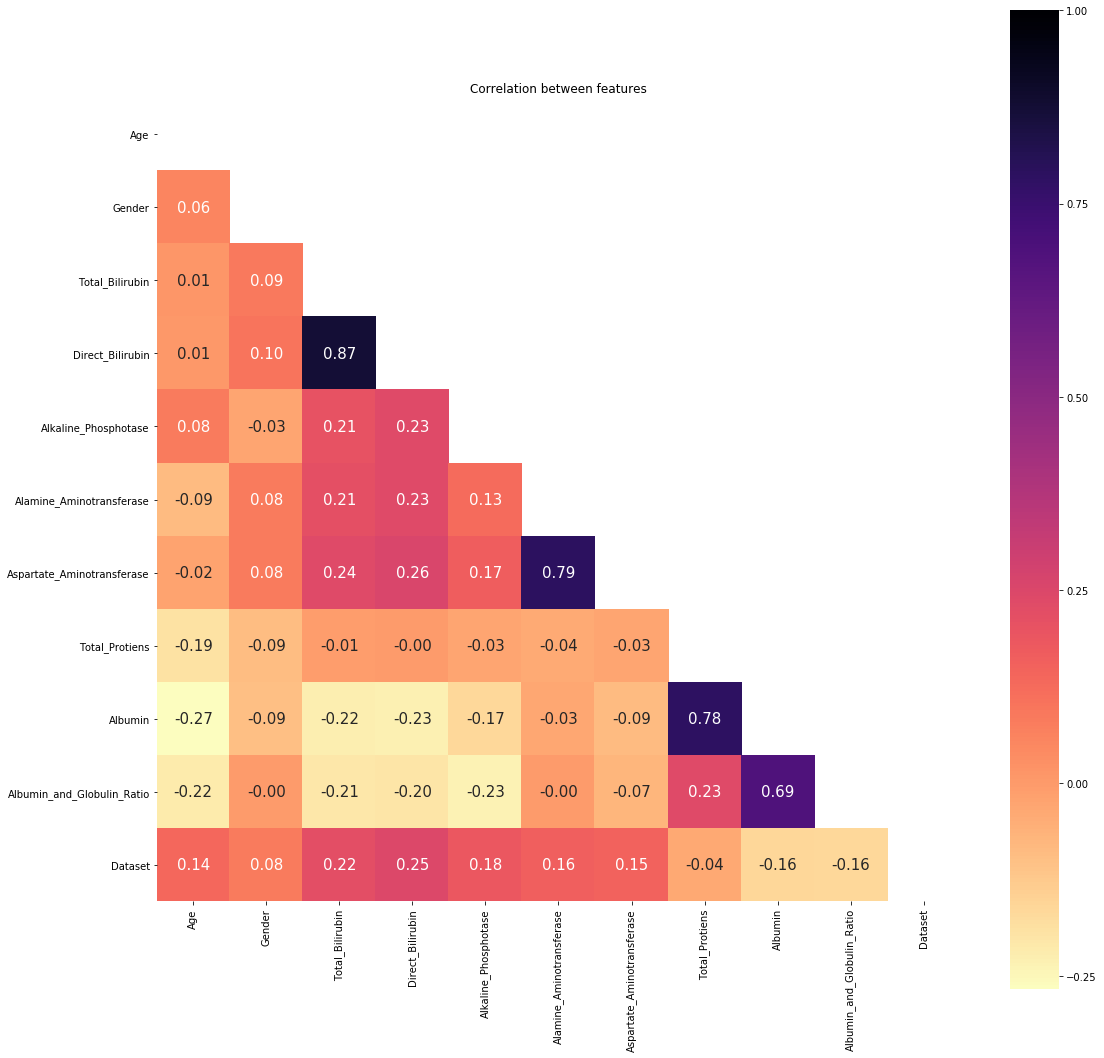

In [6]:
#Plot Correlation matrix
corr = liver_data.corr()
plt.figure(figsize=(18,18))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cbar = True,  mask=mask, square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'magma_r')
plt.title('Correlation between features')

In [7]:
#If 2 features are highly correlated with each other drop one of the feature
features = ['Age','Gender','Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Albumin','Albumin_and_Globulin_Ratio']

### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

X = liver_data[features]
y = liver_data['Dataset']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=99)
print('Shape of training set: X:{}, y:{}'.format(x_train.shape, y_train.shape))
print('Shape of test set: X:{}, y:{}'.format(x_test.shape, y_test.shape))

Shape of training set: X:(466, 7), y:(466,)
Shape of test set: X:(117, 7), y:(117,)


In [10]:
x_train.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Albumin', 'Albumin_and_Globulin_Ratio'],
      dtype='object')

### Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


### Model Training

In [54]:
#Import the model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [141]:
#Learning_Rate
#learning_rate = [0.1,0.05,0.025,0.01,0.005,0.002,0.001]

# Number of trees
#n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 95)]

# Minimum number of samples required to split a node
#min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 100, num = 95)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 40, num = 38)]

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(1, 30, num = 28)]

# Number of features to consider at every split
#max_features = ['auto','sqrt']
#subsample = [x/100 for x in range(50, 100)]

# Create the random grid
random_grid = {#'learning_rate':learning_rate,
               #'n_estimators':n_estimators,
               #'min_samples_split':min_samples_split
               'min_samples_leaf':min_samples_leaf,
               #'max_depth':max_depth,
               #'max_features':max_features,
               #'subsample':subsample
            }


gbm_model = GradientBoostingClassifier(random_state=99)
gbm_random = GridSearchCV(estimator = gbm_model, 
                               param_grid=random_grid,
                               scoring='accuracy', 
                               #n_iter = 15, 
                               cv = 5, 
                               verbose=8, 
                               #random_state=99, 
                               n_jobs = -1)
gbm_random.fit(x_train,y_train)


Fitting 5 folds for each of 38 candidates, totalling 190 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:    4.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [142]:
hyparams = gbm_random.best_params_
hyparams

{'min_samples_leaf': 20}

In [143]:
y_pred = gbm_random.predict(x_test)


In [144]:
print(classification_report(y_test,y_pred))
print('\n')
print("Accuracy:- {}%".format(round(accuracy_score(y_test,y_pred)*100,3)))

              precision    recall  f1-score   support

           0       0.74      0.57      0.64        30
           1       0.86      0.93      0.90        87

    accuracy                           0.84       117
   macro avg       0.80      0.75      0.77       117
weighted avg       0.83      0.84      0.83       117



Accuracy:- 83.761%


In [146]:
import pickle
file = open('liver_gbm.pkl','wb')
pickle.dump(gbm_random,file)

In [15]:
saved_model = pickle.load(open('liver_gbm.pkl','rb'))

In [14]:
import pickle

In [17]:
y_pred = saved_model.predict(x_test)

In [20]:
print(classification_report(y_test,y_pred))
print('\n')
print("Accuracy:- {}%".format(round(accuracy_score(y_test,y_pred)*100,3)))

              precision    recall  f1-score   support

           0       0.74      0.57      0.64        30
           1       0.86      0.93      0.90        87

    accuracy                           0.84       117
   macro avg       0.80      0.75      0.77       117
weighted avg       0.83      0.84      0.83       117



Accuracy:- 83.761%
